# install dependencies

In [3]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [4]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.01,patience: 1000,min_improvement: 0.001,max_steps: 50000,seed: 372
Step 0: Loss = 19.8954003768165890, performing 110.4 it/sec
Step 100: Loss = 19.3455166421459701, performing 15.0 it/sec
Step 200: Loss = 18.7196002844162557, performing 17.9 it/sec
Step 300: Loss = 18.0197245641591159, performing 15.2 it/sec
Step 400: Loss = 16.9021561082006002, performing 17.3 it/sec
Step 500: Loss = 14.3467591318353005, performing 15.6 it/sec
Step 600: Loss = 12.2443361823507040, performing 16.8 it/sec
Step 700: Loss = 10.8844516538695846, performing 15.7 it/sec
Step 800: Loss = 9.6161881146908588, performing 16.6 it/sec
Step 900: Loss = 8.4634696119787680, performing 15.7 it/sec
Step 1000: Loss = 7.3334389657202719, performing 16.3 it/sec
Step 1100: Loss = 5.8337704107222841, performing 15.9 it/sec
Step 1200: Loss = 4.7562286790585597, performing 13.5 it/sec
Step 1300: Loss = 4.5219581353850629, performing 15.1 it/sec
Ste

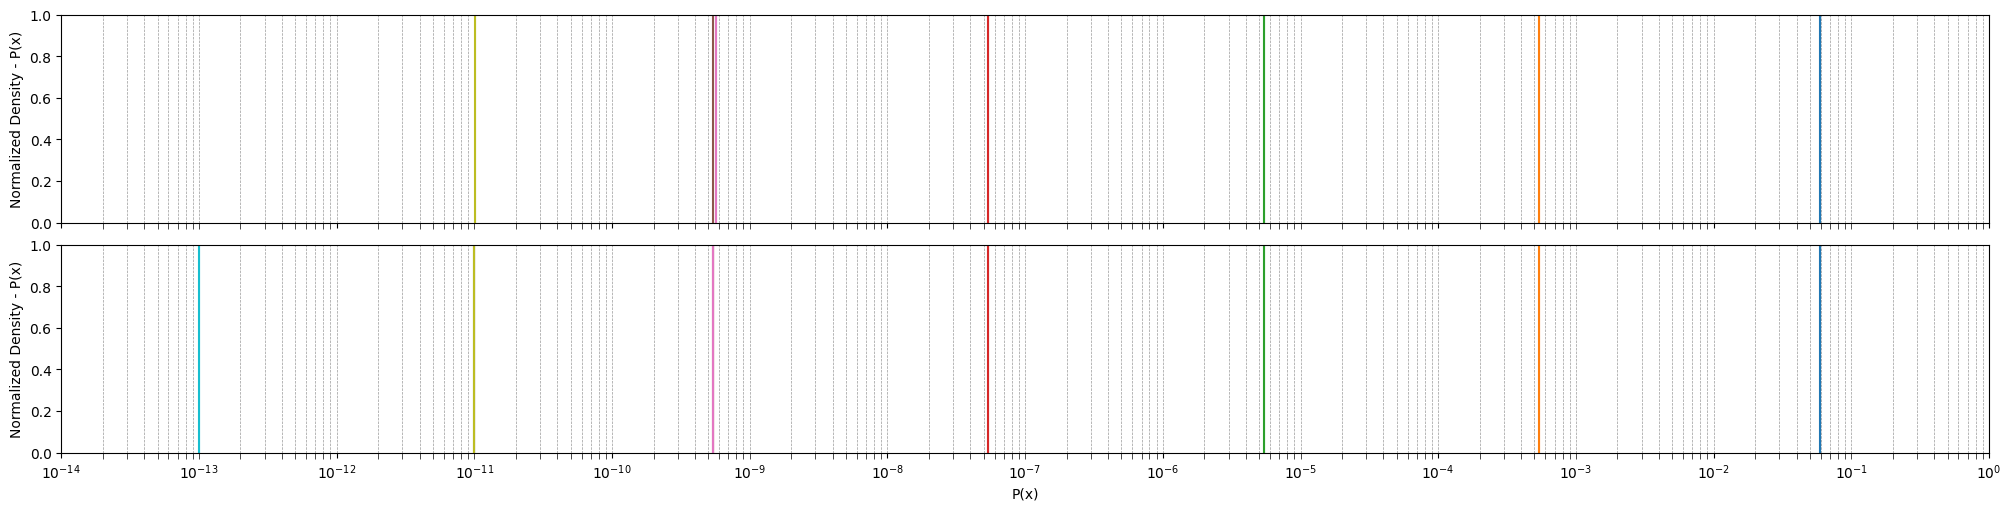

In [6]:
tunable = {
 'num_samples': 10000,      # number of monte carlo samples
 'learning_rate': 0.01,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 50000,       # maximum steps, regardless of convergence
 'patience': 1000,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 6e-2,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['SFLE', 'SPNB', 'NPPO', 'SLPE', 'DETP', 'SHTS', 'NSSS|~SHTS', 'NSSS|SHTS', 'NSSS|~DETP'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'SFLE-1': {
        'sequence': [1, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 5.95e-2,
    },
    'SFLE-2': {
        'sequence': [1, 1, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 5.4e-4,
    },
    'SFLE-3': {
        'sequence': [1, 1, 1, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 5.4e-6,
    },
    'SFLE-4': {
        'sequence': [1, 1, 1, 1, 0, 0, 0, np.nan, np.nan],
        'probability': 5.4e-8,
    },
    'SFLE-5': {
        'sequence': [1, 1, 1, 1, 0, 0, 1, np.nan, np.nan],
        'probability': 5.4e-10
    },
    'SFLE-6': {
        'sequence': [1, 1, 1, 1, 0, 1, np.nan, 0, np.nan],
        'probability': 5.4e-10
    },
    'SFLE-7': {
        'sequence': [1, 1, 1, 1, 0, 1, np.nan, 1, np.nan],
        'probability': 1e-11
    },
    'SFLE-8': {
        'sequence': [1, 1, 1, 1, 1, np.nan, np.nan, np.nan, 0],
        'probability': 1e-11
    },
    'SFLE-9': {
        'sequence': [1, 1, 1, 1, 1, np.nan, np.nan, np.nan, 1],
        'probability': 1e-13
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)